In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset
data = pd.read_csv('MergedViolenceDataTB.csv')

# Preprocesamiento básico
# 'tipo' es la variable objetivo y que tenemos variables categóricas que necesitan ser codificadas
X = data.drop('tipo', axis=1)
y = data['tipo']

# Convertir variables categóricas usando pd.get_dummies o sklearn.preprocessing.OneHotEncoder
X = pd.get_dummies(X)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Realizar predicciones
y_pred = rf_model.predict(X_test)

# Evaluar el modelo
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[ 4  0  0  1  0  0]
 [ 0  1  0  0  0  0]
 [ 0  0 15  2  0  0]
 [ 0  0  2 22  0  0]
 [ 0  0  0  0  1  0]
 [ 0  0  0  2  0  0]]
                             precision    recall  f1-score   support

                     Física       1.00      0.80      0.89         5
Física, Psicológica, Sexual       1.00      1.00      1.00         1
                Psicológica       0.88      0.88      0.88        17
                     Verbal       0.81      0.92      0.86        24
             Verbal, Física       1.00      1.00      1.00         1
        Verbal, Psicológica       0.00      0.00      0.00         2

                   accuracy                           0.86        50
                  macro avg       0.78      0.77      0.77        50
               weighted avg       0.83      0.86      0.84        50



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fitting 3 folds for each of 324 candidates, totalling 972 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and 

Mejores parámetros: {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Mejor precisión obtenida: 0.7436303331825721
                             precision    recall  f1-score   support

                     Física       1.00      0.80      0.89         5
Física, Psicológica, Sexual       1.00      1.00      1.00         1
                Psicológica       0.88      0.88      0.88        17
                     Verbal       0.81      0.92      0.86        24
             Verbal, Física       1.00      1.00      1.00         1
        Verbal, Psicológica       0.00      0.00      0.00         2

                   accuracy                           0.86        50
                  macro avg       0.78      0.77      0.77        50
               weighted avg       0.83      0.86      0.84        50

[[ 4  0  0  1  0  0]
 [ 0  1  0  0  0  0]
 [ 0  0 15  2  0  0]
 [ 0  0  2 22  0  0]
 [ 0  0  0  0  1  0]
 [ 0  0  0  2  0  0]]


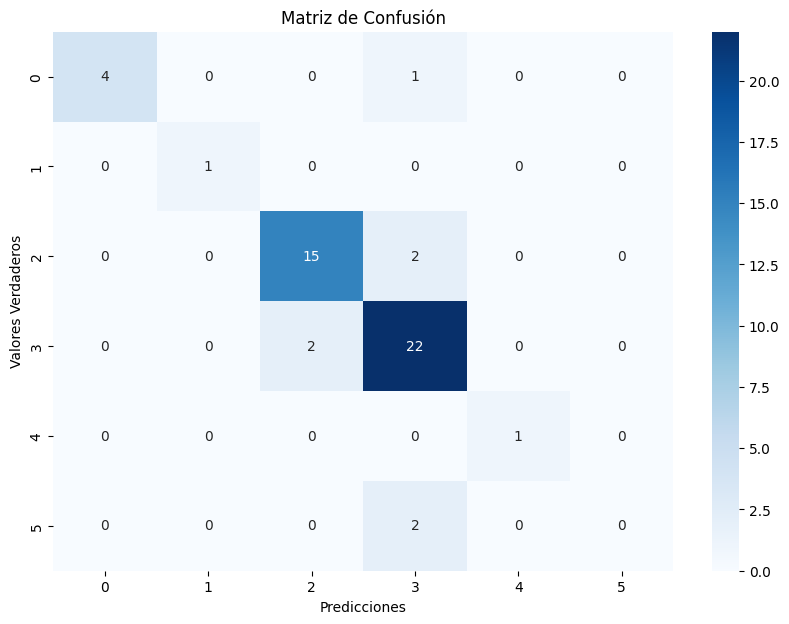

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Definir el modelo
rf = RandomForestClassifier(random_state=42)

# Definir el espacio de búsqueda de hiperparámetros
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Configurar GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

# Ajustar GridSearchCV
grid_search.fit(X_train, y_train)

# Ver los mejores parámetros y el mejor score
print("Mejores parámetros:", grid_search.best_params_)
print("Mejor precisión obtenida:", grid_search.best_score_)

# Usar el mejor modelo para hacer predicciones sobre el conjunto de prueba
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

# Evaluar el modelo
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))  # Establecer el tamaño de la figura
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')  # 'g' para formato numérico entero
plt.title('Matriz de Confusión')
plt.xlabel('Predicciones')
plt.ylabel('Valores Verdaderos')
plt.savefig('matriz_violenceTB.png')
plt.show()



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


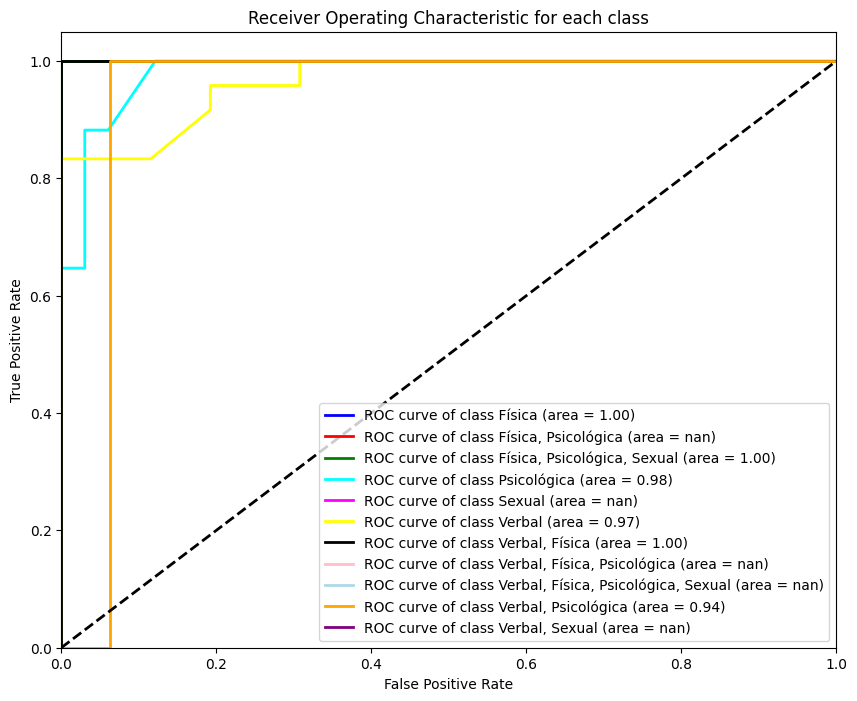

In [ ]:
import numpy as np
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
from itertools import cycle


y_prob = rf_model.predict_proba(X_test)  # Probabilidades por clase

classes = np.unique(y_train)
y_test_bin = label_binarize(y_test, classes=classes)

# Calcular ROC curve y ROC area para cada clase
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = len(classes)

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Trazar la Curva ROC para cada clase
colors = cycle(['blue', 'red', 'green', 'cyan', 'magenta', 'yellow', 'black', 'pink', 'lightblue', 'orange', 'purple', 'brown'])
plt.figure(figsize=(10, 8))

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(classes[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for each class')
plt.legend(loc="lower right")
plt.savefig('ROC_violenceRF.png')
plt.show()
